## GİRİŞ

Hastaların kalp rahatsızlığı olup olmadığını veya içindeki özelliklere göre sınıflandırılmayan bir verimiz var. Bu verileri, bir hastanın bu hastalığı olup olmadığını tahmin etmeye çalışan bir model oluşturmak için kullanacağız

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random as rnd
import os


In [2]:
df = pd.read_csv("heart.csv")


In [3]:
#verinin ilk 5 satırı
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Veri:

* yaş - yıl cinsinden yaş
* sex- cinsiyet 
* cp - göğüs ağrısı tipi
* trestbps - tansiyon (hastaneye giriş sırasında mm Hg cinsinden) 
* chol - serum kolestrol olarak mg / dl
* fbs - (açlık kan şekeri> 120 mg / dl) (1 = doğru; 0 = yanlış)
* restecg - elektrokardiyografik sonuçlar
* thalach - maksimum kalp atış hızı 
* exang - egzersize bağlı anjin (1 = evet; 0 = hayır)
* oldpeak - Dinlenmeye göre egzersizle indüklenen ST depresyonu
* eğim - tepe egzersizin ST segmentinin eğimi
* ca - floroskopi ile bulunan ana damarların (0-3) sayısı
* thal - 3 = normal; 6 = sabit hata; 7 = tersinir kusur. Akdeniz anemisi
* hedef - hastalığı var ya da yok (1 = evet, 0 = hayır)

In [4]:
#Tüm satırların null değerleri kontrol eder
df.isnull().values.any()

False

In [5]:
print('Veri kümesinin dağılımının merkezi eğilimini, dağılımını ve şeklini özetleyen istatistik.')
df.describe()

Veri kümesinin dağılımının merkezi eğilimini, dağılımını ve şeklini özetleyen istatistik.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Yukarıdaki veri setinde açıklanan özellikler şunlardır:

1. Count, bir özellikteki NoN boş satır sayısını bize bildirir.

2. Ortalama, bize bu özelliğin ortalama değerini söyler.

3. Std bize bu özelliğin Standart Sapma Değerini söyler.

4. Min bize bu özelliğin minimum değerini söyler.

5. % 25,% 50 ve% 75, her özelliğin yüzde / çeyreğidir.

6. Max, bu özelliğin maksimum değerini bize bildirir.

## VERİ İNCELEME

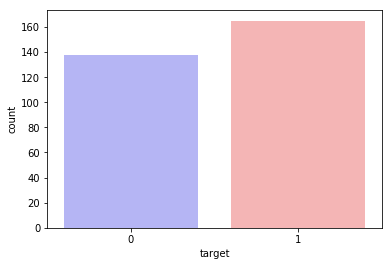

In [6]:
df.target.value_counts()
sns.countplot(x="target", data=df, palette="bwr")
plt.show()


In [7]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Kalp Hastalığı Olmayan Hasta Yüzdesi {:.2f}% ve Sayısı".format((countNoDisease / (len(df.target))*100)), countNoDisease)
print("Kalp Hastalığı Olan Hasta Yüzdesi: {:.2f}% ve Sayısı".format((countHaveDisease / (len(df.target))*100)), countHaveDisease )



Kalp Hastalığı Olmayan Hasta Yüzdesi 45.54% ve Sayısı 138
Kalp Hastalığı Olan Hasta Yüzdesi: 54.46% ve Sayısı 165


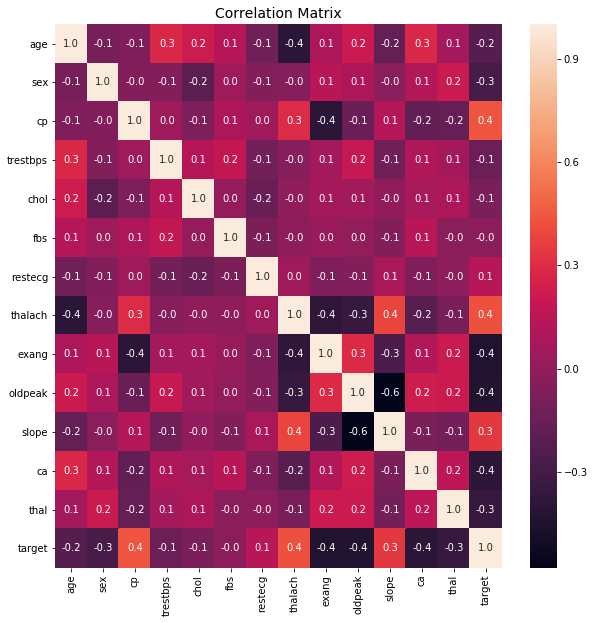

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.title("Correlation Matrix",fontsize=14)
plt.show()

#### Özellikler arasındaki korelasyon

Veri kümesi içindeki değişkenler birçok nedenden dolayı ilişkili olabilir. Değişkenler arasındaki ilişkileri daha iyi anlamak için veri analizi ve modellemede faydalı olabilir. İki değişken arasındaki istatistiksel ilişki, korelasyonları olarak adlandırılır.

Bir korelasyon pozitif olabilir, yani her iki değişken de aynı yönde hareket eder veya negatif, yani bir değişkenin değeri arttığında, diğer değişkenlerin değerlerinin azaldığı anlamına gelir. Korelasyon sıfır olabilir, bu da değişkenlerin ilişkisiz olduğu anlamına gelir.

In [9]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

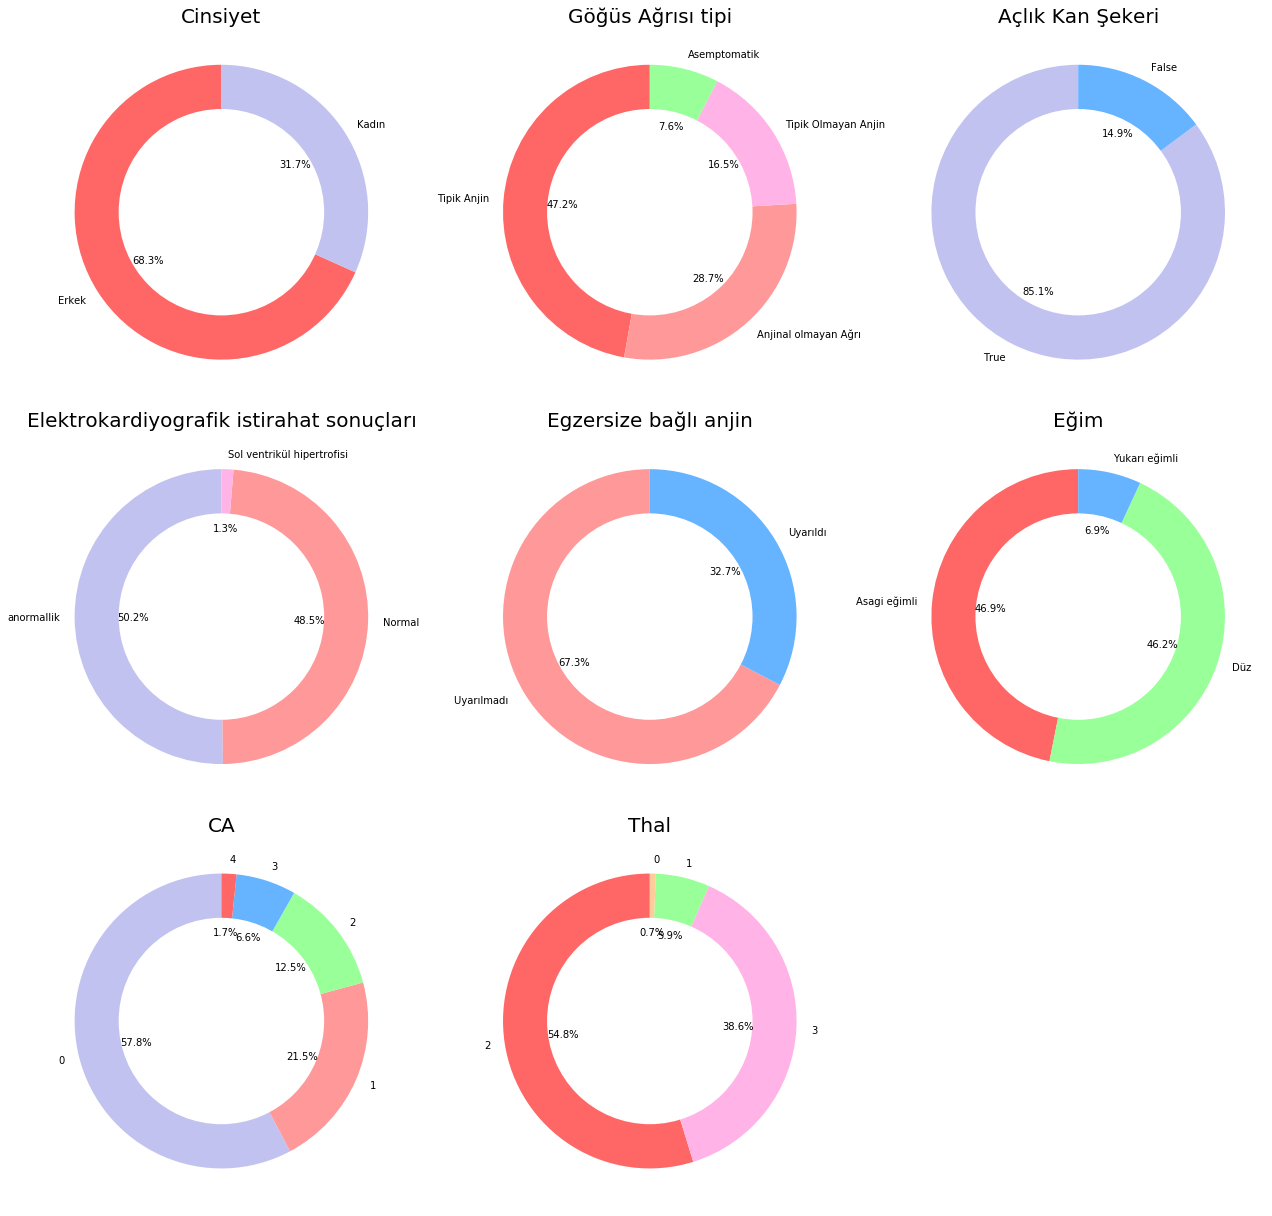

In [10]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Cinsiyet grafiği
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Kadın', 1: 'Erkek'}, 'Cinsiyet')

# Göğüs ağrısı grafiği
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Tipik Anjin', 1:'Tipik Olmayan Anjin', 2:'Anjinal olmayan Ağrı',3:'Asemptomatik'}, 'Göğüs Ağrısı tipi')

# Açlık kan şekeri grafiği
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Açlık Kan Şekeri')

# Elektrokardiyografik istirahat sonuçları
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'anormallik', 2:'Sol ventrikül hipertrofisi'}, 'Elektrokardiyografik istirahat sonuçları')

# Egzersize bağlı anjin
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Uyarılmadı ',1:'Uyarıldı'}, 'Egzersize bağlı anjin')

# anjin
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Yukarı eğimli', 1:'Düz', 2:'Asagi eğimli'}, 'Eğim')

# ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

###### Çeşitli niteliklerin dağılımları


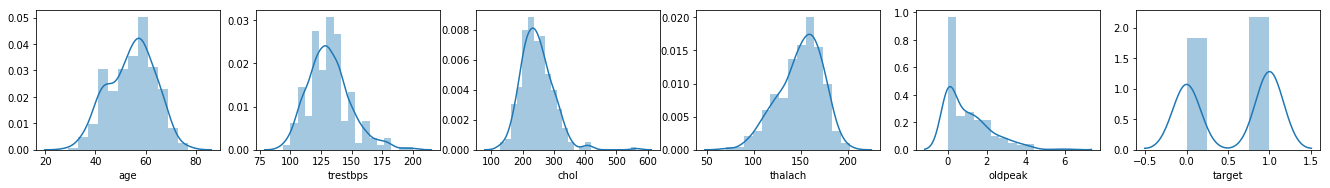

In [11]:
#tansiyon,kolestrol,max kalp atış hızı,oldpeak - Dinlenmeye göre egzersizle indüklenen ST depresyonu
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(df[f], kde=True)

Age, trestbps, chol özellikleri normal olarak dağılmıştır.
50-60 yaş arası kişilerde kalp hastalığına yakalanma olasılığı.
Hedef değişken dengelidir.

### Veri Ön İşleme
#### Bağımsız ve Hedef Değişkenleri Çıkarma

In [12]:
#göğüs ağrısı ,eğim,max kalp atış hızı, elektrokardiyografik sonuçlar
nominal_features = ['cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(df.drop(['target'], axis = 1), columns = nominal_features, drop_first=True).values
y = df.target.values


#### Verileri Train ve Test Setine Bölme

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Özellik Ölçeklendirme

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### SVM ve KNN

SVM modeli, sınıflandırma konusunda kullanılan oldukça etkili ve basit yöntemlerden biridir. Sınıflandırma için bir düzlemde bulunan iki grup arasında bir sınır çizilerek iki gruba ayırmak mümkündür.  Yani sisteme giren her girdinin bir özellik çıkarımı (feature extraction) yapılır ve sonuçta bu iki boyutlu düzlemde her girdiyi gösteren farklı bir nokta elde edilmiştir. Bu noktaların sınıflandırılması demek, çıkarılmış olan özelliklere göre girdilerin sınıflandırılmasıdır. SVM sınıflandırma modelinin çok sayıda parametresi vardır. Algoritma çalıştırıldığında test doğruluk değerini hesaplar.

In [15]:
# SVM(Destek Vektör Makineleri)
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test,y_test)*100))


Test Accuracy of SVM Algorithm: 86.89%


### KNN
Sınıflandırmada (classification) kullanılan bu algoritmaya göre sınıflandırma sırasında çıkarılan özelliklerden (feature extraction), sınıflandırılmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlığına bakılmasıdır. Örneğin k = 3 için yeni bir eleman sınıflandırılmak istensin. bu durumda eski sınıflandırılmış elemanlardan en yakın 3 tanesi alınır. Bu elamanlar hangi sınıfa dahilse, yeni eleman da o sınıfa dahil edilir. Mesafe hesabından genelde öklit mesafesi (euclid distance) kullanılabilir.

4 NN Score: 80.33%


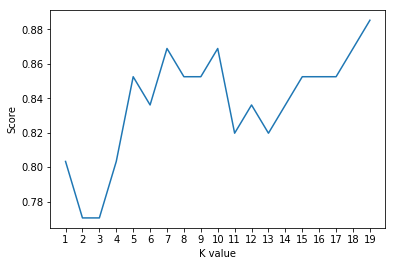

Maximum KNN Score is 88.52%


In [16]:
# KNN


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors means k
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(4, knn.score(x_test, y_test)*100))


# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

### Model Değerlendirmesi

In [17]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)
#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred_svm))

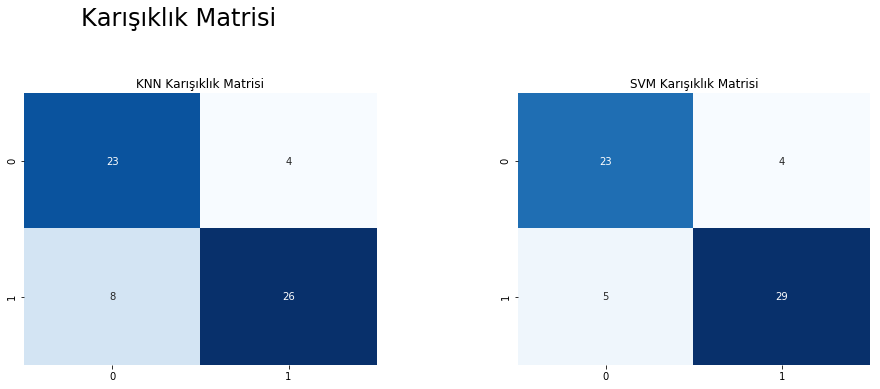

In [18]:
plt.figure(figsize=(24,12))
plt.suptitle("Karışıklık Matrisi",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("KNN Karışıklık Matrisi")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("SVM Karışıklık Matrisi")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

Gerçek Pozitifler (TP): Bunlar gerçek değeri 1 ve tahmin ettiğimiz değerin de 1 olduğu örneklerdir.

Gerçek Negatifler (TN): Bunlar gerçek değeri 0 ve tahmin ettiğimiz değerin de 0 olduğu örneklerdir.

Yanlış Pozitifler (FP): Bunlar gerçek değeri 0 ancak tahmin ettiğimiz değerin 1 olduğu örneklerdir.

Yanlış Negatifler (FN): Bunlar gerçek değeri 1 ancak tahmin ettiğimiz değerin 0 olduğu örneklerdir.